In [23]:
# Create cutouts and sigma maps for 3D HST dataset

In [24]:
# https://github.com/Grillard/GalfitPyWrap may be useful for setting up inputs
import sys
sys.path.insert(0,'/data/emiln/XLSSU122/analysis/galfit/GalfitPyWrap')
from GalfitPyWrap import galfitwrap as gf
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import glob
from scipy import ndimage
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.io import fits
from astropy.io import ascii
from astropy import wcs
from astropy.table import Table, hstack, join
from __future__ import division
import fnmatch
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Load 3DHST Catalog

In [25]:
# Load 3d HST catalog
hst_cat = '/data/emiln/XLSSU122/analysis/3dhst/catalogs/cosmos_3dhst.v4.1.cats/Catalog/cosmos_3dhst.v4.1.cat'
hst_df = pd.read_csv(hst_cat,header=0,delim_whitespace=True,skiprows=[1,2,3])
# hst_df2 = cos_df[cos_df.columns[:-1]]
# cos_df2.columns = cos_df.columns[1:]
# cos_df = cos_df2
# print len(cos_df)
# cos_df = cos_df[(cos_df['mag']<23) & (cos_df['f']==0)] # Let's focus on objects brighter than mag 23 for now
# cos_df = cos_df[(cos_df['mag']<21) & (cos_df['f']==0)] # Let's focus on objects brighter than mag 23 for now
# cos_df = cos_df[(cos_df['dn']/cos_df['n'])<1] # Filter out objects with > 100% error
# # f=0 are all "good fits" https://users.ugent.be/~avdrwel/data/readme_candels.txt
# print len(cos_df)
# cos_df.columns.values
hst_df.columns.values
hst_df

,id,x,y,ra,dec,faper_F160W,eaper_F160W,faper_F140W,eaper_F140W,f_F160W,...,IRAC2_contam,IRAC3_contam,IRAC4_contam,contam_flag,f140w_flag,use_phot,near_star,nexp_f125w,nexp_f140w,nexp_f160w
0,1,10091.6,7283.0,150.071442,2.169014,4.987774,0.180659,-69.75880,-69.75881,7.078528,...,0.458,-99.000,-99.000,1,0,0,0,1,0,1
1,2,10083.4,7285.7,150.071579,2.169060,2.158842,0.165525,-61.84459,-61.84459,3.455845,...,1.744,-99.000,-99.000,1,0,0,0,1,0,1
2,3,9847.2,7529.0,150.075516,2.173114,18.137190,0.045990,-30.69575,-30.69575,58.496120,...,0.004,0.014,0.028,0,0,1,0,6,0,6
3,4,10277.1,7326.9,150.068344,2.169745,0.539666,0.096470,-81.87084,-81.87084,0.652575,...,0.002,-99.000,-99.000,0,0,1,0,2,0,2
4,5,10090.1,7380.9,150.071457,2.170646,0.727406,0.068492,-87.35809,-87.35809,0.824345,...,0.001,-99.000,-99.000,0,0,1,0,4,0,4
5,6,10201.7,7388.2,150.069595,2.170768,0.393757,0.054795,-79.56773,-79.56772,0.489922,...,-0.763,-99.000,-99.000,0,0,1,0,4,0,4
6,7,10276.0,7405.9,150.068359,2.171062,3.034307,0.067463,-74.09850,-74.09851,4.054014,...,0.485,-99.000,-99.000,1,0,0,0,4,0,4
7,8,10227.8,7404.5,150.069168,2.171038,0.340244,0.055854,-70.89510,-70.89510,0.475127,...,2.516,-99.000,-99.000,1,0,1,0,4,0,4
8,9,9579.7,7404.1,150.079971,2.171032,0.683393,0.117511,-52.39865,-52.39865,1.291177,...,1.313,-99.000,-99.000,1,0,1,0,2,0,2
9,10,10263.6,7434.9,150.068573,2.171545,4.488521,0.057601,-67.38472,-67.38472,6.594427,...,0.224,-99.000,-99.000,0,0,0,0,4,0,4


In [26]:
z_df = pd.read_csv('/data/emiln/XLSSU122/analysis/3dhst/catalogs/cosmos_3dhst.v4.1.cats/Catalog/cosmos_3dhst_v4.1.5_catalogs/cosmos_3dhst.v4.1.5.zbest.fout',\
                   delim_whitespace=True)
mdf = hst_df.merge(z_df,on='id',how='inner')

(array([15233.,     0.,     0.,     0.,     0.,   767.,     0.,     0.,
            0., 17879.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

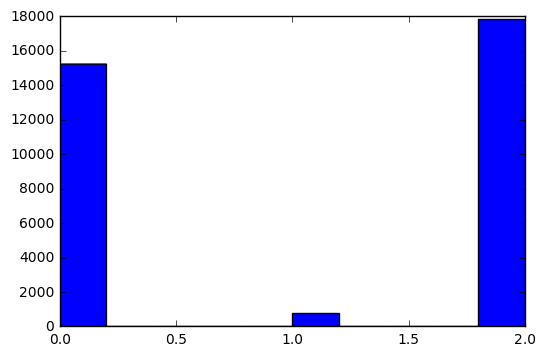

In [27]:
plt.hist(hst_df['star_flag'])

In [28]:
hst_df['z_spec']

0     0.8855
1     0.8855
2    -1.0000
3    -1.0000
4    -1.0000
5    -1.0000
6    -1.0000
7    -1.0000
8    -1.0000
9    -1.0000
10   -1.0000
11   -1.0000
12   -1.0000
13   -1.0000
14   -1.0000
...
33864   -1
33865   -1
33866   -1
33867   -1
33868   -1
33869   -1
33870   -1
33871   -1
33872   -1
33873   -1
33874   -1
33875   -1
33876   -1
33877   -1
33878   -1
Name: z_spec, Length: 33879, dtype: float64

(array([146., 132.,  99.,  87.,  73.,  76.,  63.,  46.,  45.,  28.,  38.,
         37.,  25.,  28.,  43.,  27.,  17.,  21.,  18.]),
 array([12.        , 13.73684211, 15.47368421, 17.21052632, 18.94736842,
        20.68421053, 22.42105263, 24.15789474, 25.89473684, 27.63157895,
        29.36842105, 31.10526316, 32.84210526, 34.57894737, 36.31578947,
        38.05263158, 39.78947368, 41.52631579, 43.26315789, 45.        ]),
 <a list of 19 Patch objects>)

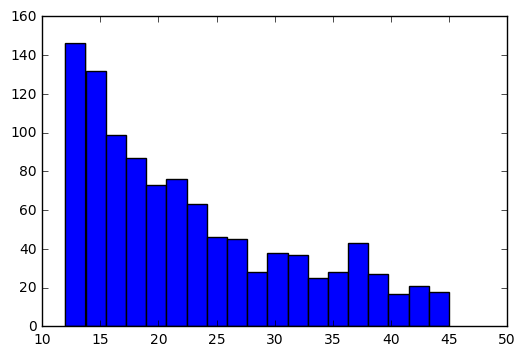

In [29]:
plt.hist(hst_df['f_F140W'],bins=np.linspace(12,45,20))

In [30]:
mdf.columns.values

array(['id', 'x', 'y', 'ra', 'dec', 'faper_F160W', 'eaper_F160W',
       'faper_F140W', 'eaper_F140W', 'f_F160W', 'e_F160W', 'w_F160W',
       'f_U', 'e_U', 'w_U', 'f_B', 'e_B', 'w_B', 'f_G', 'e_G', 'w_G',
       'f_V', 'e_V', 'w_V', 'f_F606W', 'e_F606W', 'w_F606W', 'f_R', 'e_R',
       'w_R', 'f_Rp', 'e_Rp', 'w_Rp', 'f_I', 'e_I', 'w_I', 'f_Ip', 'e_Ip',
       'w_Ip', 'f_F814W', 'e_F814W', 'w_F814W', 'f_Z', 'e_Z', 'w_Z',
       'f_Zp', 'e_Zp', 'w_Zp', 'f_UVISTA_Y', 'e_UVISTA_Y', 'w_UVISTA_Y',
       'f_F125W', 'e_F125W', 'w_F125W', 'f_J1', 'e_J1', 'w_J1', 'f_J2',
       'e_J2', 'w_J2', 'f_J3', 'e_J3', 'w_J3', 'f_J', 'e_J', 'w_J',
       'f_UVISTA_J', 'e_UVISTA_J', 'w_UVISTA_J', 'f_F140W', 'e_F140W',
       'w_F140W', 'f_H1', 'e_H1', 'w_H1', 'f_H2', 'e_H2', 'w_H2', 'f_H',
       'e_H', 'w_H', 'f_UVISTA_H', 'e_UVISTA_H', 'w_UVISTA_H', 'f_K',
       'e_K', 'w_K', 'f_Ks', 'e_Ks', 'w_Ks', 'f_UVISTA_Ks', 'e_UVISTA_Ks',
       'w_UVISTA_Ks', 'f_IRAC1', 'e_IRAC1', 'w_IRAC1', 'f_IRAC2',
       

In [31]:
# Filter 3D HST catalog
zthresh=0.1
print len(mdf)
# fhst_df = hst_df[(hst_df['faper_F140W']<25) & (hst_df['faper_F140W']>15)]
mdf['F140W'] = 25.0 - 2.5 * np.log10(mdf['f_F140W'])
fhst_df = mdf[(mdf['F140W']<24) & (mdf['F140W']>15)]
# hst_df = hst_df[hst_df['star_flag']==0] # remove stars
print len(fhst_df)
fhst_df = fhst_df[fhst_df['use_phot']==1]
print len(fhst_df)
fhst_df = fhst_df[fhst_df['flags']<2]
print len(fhst_df)
fhst_df = fhst_df[abs(fhst_df['z']-2.0)<zthresh]
print len(fhst_df)
# print fhst_df['z_spec']
fhst_df

33879
4996
4234
2898
136


,id,x,y,ra,dec,faper_F160W,eaper_F160W,faper_F140W,eaper_F140W,f_F160W,...,ltau,metal,lage,Av,lmass,lsfr,lssfr,la2t,chi2,F140W
690,691,8095.2,8386.8,150.104736,2.187411,2.148079,0.042300,1.848545,0.085333,3.666291,...,7.0,0.02,8.0,1.0,9.84,-1.33,-11.17,1.0,1.770,23.752483
2139,2140,5526.6,9205.7,150.147583,2.201060,1.852057,0.043311,1.432984,0.142042,3.701528,...,8.4,0.02,8.9,0.6,10.08,0.52,-9.56,0.5,1.120,23.857580
2330,2331,6045.7,9313.5,150.138916,2.202856,2.173798,0.042267,2.087376,0.080829,3.719533,...,8.0,0.02,8.4,0.1,9.50,0.60,-8.90,0.4,1.280,23.617825
2711,2712,6046.0,9536.6,150.138916,2.206575,2.316963,0.042506,2.138305,0.080798,3.279080,...,8.8,0.02,8.7,0.4,9.53,0.81,-8.72,-0.1,1.450,23.797743
2715,2716,3728.2,9624.6,150.177567,2.208040,4.132455,0.041862,3.513331,0.081873,19.314090,...,9.8,0.02,9.1,1.0,10.81,1.85,-8.95,-0.7,1.260,21.961537
2815,2816,5917.5,9650.5,150.141052,2.208472,16.515860,0.042524,12.746680,0.079933,26.312110,...,8.2,0.02,9.2,0.3,11.15,-1.12,-12.28,1.0,1.910,21.730871
2838,2839,3775.9,9615.0,150.176773,2.207880,3.193642,0.041912,2.483635,0.114060,5.167492,...,8.8,0.02,9.4,0.5,10.59,0.31,-10.28,0.6,1.850,23.489796
3284,3285,7780.5,9872.5,150.109985,2.212173,3.527207,0.042904,2.842734,0.083650,4.828131,...,7.8,0.02,8.8,1.0,10.38,-1.53,-11.91,1.0,1.410,23.524789
3349,3350,4964.3,9915.1,150.156952,2.212882,2.168617,0.059985,2.003786,0.055187,3.582252,...,7.8,0.02,8.2,0.3,9.47,0.75,-8.71,0.4,1.300,23.700438
3575,3576,7043.5,10038.0,150.122284,2.214931,2.454469,0.043094,1.939468,0.084151,4.894064,...,7.0,0.02,9.1,0.1,10.32,-99.00,-99.00,2.1,0.774,23.531513


In [33]:
fhst_df.to_csv('/data/emiln/XLSSU122/analysis/3dhst/catalogs/merged_highz_thresh'+str(zthresh)+'_clean.cat',index=None)
# pd.read_csv('/data/emiln/XLSSU122/analysis/3dhst/catalogs/merged_highz.cat')

--------------

### Make source cutouts

In [34]:
fhst_df = pd.read_csv('/data/emiln/XLSSU122/analysis/3dhst/catalogs/merged_highz_thresh'+str(zthresh)+'_clean.cat')

In [18]:
# Load HST fits images

hst_file = '/data/emiln/XLSSU122/analysis/3dhst/cosmos_3dhst_v4.0_f140w/cosmos_3dhst.v4.0.F140W_orig_sci.fits.gz' # conv is F140W convolved to F160W PSF
# http://monoceros.astro.yale.edu/RELEASE_V4.0/3dhst_readme_v4.1.pdf
hst_exp_file = '/data/emiln/XLSSU122/analysis/3dhst/cosmos_3dhst_v4.0_f140w/cosmos_3dhst.v4.0.F140W_exp.fits.gz'
# hst_rms_file = '/data/emiln/XLSSU122/analysis/3dhst/cosmos_3dhst_v4.0_f140w/cosmos_3dhst.v4.0.F140W_orig_wht.fits.gz'
hst_wht_file = '/data/emiln/XLSSU122/analysis/3dhst/cosmos_3dhst_v4.0_f140w/cosmos_3dhst.v4.0.F140W_orig_wht.fits.gz'
# From https://iopscience.iop.org/article/10.1088/0067-0049/214/2/24/pdf:
# The inverse variance weight map is based on the flat-field reference file
# and computed dark value from the image header and the final
# weight image accounts for all background noise sources (sky
# level, read noise, dark current, etc.) but not the Poisson noise
# from the objects themselves.

hst_hdulist = fits.open(hst_file)
full_wcs = wcs.WCS(hst_hdulist[0].header)

exp_hdulist = fits.open(hst_exp_file)
# rms_hdulist = fits.open(hst_rms_file)
wht_hdulist = fits.open(hst_wht_file)

In [19]:
# For each object in fhst_df
# Make a directory to store data products
# Create image cutout with same header and updated wcs info
# Create cutout sigma image in units of cps

import copy

# exptime=1900 # https://archive.stsci.edu/pub/hlsp/candels/cosmos/cos-tot/v1.0/hlsp_candels_hst_cos-tot_readme_v1.0.pdf
w=400
# df = cos_df[cos_df['NUMBER']==886]
# df = cos_df[0:2]
# df = cos_df
df = fhst_df

# df = cos_df
for idx, r in df.iterrows():
    ra = r.ra
    dec = r.dec
    pixcrd = full_wcs.wcs_world2pix(ra,dec, 1)
    print pixcrd
    X = int(pixcrd[0])
    Y = int(pixcrd[1])
    ID = int(r['id'])
    
    print "ID", ID
    print "RA:",ra
    print "DEC:",dec
    print "Initial X:", X
    print "Initial Y:", Y
    
    tdir = '/data/emiln/XLSSU122/analysis/3dhst/galfit_results/'+str(ID)
    try:
        os.mkdir(tdir)
    except:
        print("Directory already exists.")

    wmapcut = full_wcs[Y-w:Y+w,X-w:X+w]
    datacut = hst_hdulist[0].data[Y-w:Y+w,X-w:X+w]
    expcut = exp_hdulist[0].data[Y-w:Y+w,X-w:X+w]
#     rmscut = rms_hdulist[0].data[Y-w:Y+w,X-w:X+w]
    whtcut = wht_hdulist[0].data[Y-w:Y+w,X-w:X+w] # inverse variance
    rmscut = np.sqrt(1./whtcut) # stdev per pixel
    print expcut.shape
    print datacut.shape
    print rmscut.shape
    print whtcut.shape

    newdata = datacut # this is in ELECTRONS/s
    newexp = expcut
#     newrms = rmscut # this is in ELECTRONS/s
    newwht = whtcut
    newcounts = newdata * expcut 
    newcounts2 = newdata * expcut / 2.5 # Should divide by the gain = 2.5 (e/count) to get this in counts
    
#     central_mask = np.zeros(newdata.shape)
#     xx, yy = np.meshgrid(np.arange(central_mask.shape[0]),np.arange(central_mask.shape[1]))
#     xc = newdata.shape[0]/2
#     yc = newdata.shape[1]/2
#     rthresh = r.FLUX_RADIUS_1_F125W # Mask out inner 20% light radius
#     central_mask_IDs = (xx-xc)**2+(yy-yc)**2 < rthresh**2
#     central_mask[central_mask_IDs] = 1
    
    nonzero_counts = newcounts.copy()
    nonzero_counts[nonzero_counts<0] = 0
    
    nonzero_counts2 = newcounts2.copy()
    nonzero_counts2[nonzero_counts2<0] = 0
    
    newcounts_meanexp = newdata * np.mean(expcut)
    nonzero_counts_meanexp = newcounts_meanexp.copy()
    nonzero_counts_meanexp[nonzero_counts_meanexp<0] = 0
    print np.min(nonzero_counts)
    
    newcounts_meanexp2 = newdata * np.mean(expcut) / 2.5
    nonzero_counts_meanexp2 = newcounts_meanexp2.copy()
    nonzero_counts_meanexp2[nonzero_counts_meanexp2<0] = 0
    
#     newsigma = (np.sqrt(1./rmscut) + np.sqrt(nonzero_counts))/expcut
#     newsigma_meanexp = (np.sqrt(1./rmscut) + np.sqrt(nonzero_counts_meanexp))/np.mean(expcut)
#     newsigma_counts = np.sqrt(rmscut * np.mean(expcut)) / 2.5 + np.sqrt(nonzero_counts_meanexp2)
    
    # RMS + POISSON
    newsigma_rms_meanexp = rmscut + np.sqrt(nonzero_counts_meanexp)/np.mean(expcut)
#     newsigma_counts = np.sqrt(rmscut * np.mean(expcut)) / 2.5 + np.sqrt(nonzero_counts_meanexp2)
    
#     newsigma = (np.sqrt(1./newwht) + np.sqrt(nonzero_counts))/expcut
#     newsigma_meanexp = (np.sqrt(1./newwht) + np.sqrt(nonzero_counts_meanexp))/np.mean(expcut)
#     newsigma_counts = (np.sqrt(1./newwht) + np.sqrt(nonzero_counts)) / 2.5

    
#     new_cos_hdu = fits.PrimaryHDU(newdata)
#     new_cos_hdul = fits.HDUList([new_cos_hdu])
#     new_cos_hdul[0].header = cos_hdulist[0].header
#     new_cos_hdul[0].header.update(wmapcut.to_header()) # All centers will be at (100,100) in physical/image coords after this
#     new_cos_filename = tdir+'/cutout.fits'
#     new_cos_hdul.writeto(new_cos_filename, clobber=True)

##### Oct 10 ####

    new_cos_hdu = fits.PrimaryHDU(newdata)
    new_cos_hdul = fits.HDUList([new_cos_hdu])
    new_cos_hdul[0].header = hst_hdulist[0].header
    new_cos_hdul[0].header.update(wmapcut.to_header()) # All centers will be at (100,100) in physical/image coords after this
    new_cos_hdul[0].header['EXPTIME'] = 1 #CPS
    new_cos_hdul[0].header['GAIN'] = 2.5 #CPS
    new_cos_filename = tdir+'/data_cps.fits'
    new_cos_hdul.writeto(new_cos_filename, clobber=True)
    
#     new_cos_hdu = fits.PrimaryHDU(central_mask)
#     new_cos_hdul = fits.HDUList([new_cos_hdu])
#     new_cos_hdul[0].header = cos_hdulist[0].header
#     new_cos_hdul[0].header.update(wmapcut.to_header()) # All centers will be at (100,100) in physical/image coords after this
#     new_cos_hdul[0].header['EXPTIME'] = 1 #CPS
#     new_cos_hdul[0].header['GAIN'] = 2.5 #CPS
#     new_cos_filename = tdir+'/20p_mask.fits'
#     new_cos_hdul.writeto(new_cos_filename, clobber=True)

    new_sigma_hdu = fits.PrimaryHDU(newsigma_rms_meanexp)
    new_sigma_hdul = fits.HDUList([new_sigma_hdu])
    new_sigma_hdul[0].header = copy.deepcopy(wht_hdulist[0].header)
    new_sigma_hdul[0].header.update(wmapcut.to_header()) # All centers will be at (100,100) in physical/image coords after this
    new_sigma_hdul[0].header['EXPTIME'] = 1 #CPS
    new_cos_hdul[0].header['GAIN'] = 2.5 #CPS
    new_sigma_filename = tdir+'/sigma_rms_meanexp_cps.fits'
    new_sigma_hdul.writeto(new_sigma_filename, clobber=True)

####################
    
#     new_sigma_hdu = fits.PrimaryHDU(newsigma_counts)
#     new_sigma_hdul = fits.HDUList([new_sigma_hdu])
#     new_sigma_hdul[0].header = copy.deepcopy(rms_hdulist[0].header)
#     new_sigma_hdul[0].header.update(wmapcut.to_header()) # All centers will be at (100,100) in physical/image coords after this
#     new_sigma_filename = tdir+'/sigma_meanexp_counts.fits'
#     new_sigma_hdul.writeto(new_sigma_filename, clobber=True)

#     new_sigma_hdu3 = fits.PrimaryHDU(newsigma_counts)
#     new_sigma_hdul3 = fits.HDUList([new_sigma_hdu3])
#     new_sigma_hdul3[0].header = copy.deepcopy(rms_hdulist[0].header)
#     new_sigma_hdul3[0].header.update(wmapcut.to_header()) # All centers will be at (100,100) in physical/image coords after this
#     new_sigma_hdul3[0].header['EXPTIME'] = exptime
#     new_sigma_filename = tdir+'/sigma_meanexp_counts_ADU_exp_adjusted.fits'
#     new_sigma_hdul3.writeto(new_sigma_filename, clobber=True)
    
#     new_sigma_hdu = fits.PrimaryHDU(nonzero_counts_meanexp2)
#     new_sigma_hdul = fits.HDUList([new_sigma_hdu])
#     new_sigma_hdul[0].header = copy.deepcopy(rms_hdulist[0].header)
#     new_sigma_hdul[0].header.update(wmapcut.to_header()) # All centers will be at (100,100) in physical/image coords after this
#     new_sigma_filename = tdir+'/counts_cutout_meanexp_ADU.fits'
#     new_sigma_hdul.writeto(new_sigma_filename, clobber=True)
    
#     new_sigma_hdu2 = fits.PrimaryHDU(nonzero_counts_meanexp2)
#     new_sigma_hdul2 = fits.HDUList([new_sigma_hdu2])
#     new_sigma_hdul2[0].header = copy.deepcopy(rms_hdulist[0].header)
#     new_sigma_hdul2[0].header.update(wmapcut.to_header()) # All centers will be at (100,100) in physical/image coords after this
#     new_sigma_hdul2[0].header['EXPTIME'] = exptime
#     new_sigma_filename = tdir+'/counts_cutout_meanexp_ADU_exp_adjusted.fits'
#     new_sigma_hdul2.writeto(new_sigma_filename, clobber=True)


#     new_sigma_hdu = fits.PrimaryHDU(newsigma)
#     new_sigma_hdul = fits.HDUList([new_sigma_hdu])
#     new_sigma_hdul[0].header = rms_hdulist[0].header
#     new_sigma_hdul[0].header.update(wmapcut.to_header()) # All centers will be at (100,100) in physical/image coords after this
#     new_sigma_filename = tdir+'/wht_sigma_cutout.fits'
#     new_sigma_hdul.writeto(new_sigma_filename, clobber=True)
    
#     new_sigma_meanexp_hdu = fits.PrimaryHDU(newsigma_meanexp)
#     new_sigma_meanexp_hdul = fits.HDUList([new_sigma_meanexp_hdu])
#     new_sigma_meanexp_hdul[0].header = rms_hdulist[0].header
#     new_sigma_meanexp_hdul[0].header.update(wmapcut.to_header()) # All centers will be at (100,100) in physical/image coords after this
#     new_sigma_meanexp_filename = tdir+'/wht_sigma_meanexp_cutout.fits'
#     new_sigma_meanexp_hdul.writeto(new_sigma_meanexp_filename, clobber=True)
    
#     new_counts_hdu = fits.PrimaryHDU(newcounts)
#     new_counts_hdul = fits.HDUList([new_counts_hdu])
#     new_counts_hdul[0].header = cos_hdulist[0].header
#     new_counts_hdul[0].header.update(wmapcut.to_header()) # All centers will be at (100,100) in physical/image coords after this
#     new_counts_filename = tdir+'/counts_cutout.fits'
#     new_counts_hdul.writeto(new_counts_filename, clobber=True)
    
#     new_counts_meanexp_hdu = fits.PrimaryHDU(newcounts_meanexp)
#     new_counts_meanexp_hdul = fits.HDUList([new_counts_meanexp_hdu])
#     new_counts_meanexp_hdul[0].header = cos_hdulist[0].header
#     new_counts_meanexp_hdul[0].header.update(wmapcut.to_header()) # All centers will be at (100,100) in physical/image coords after this
#     new_counts_meanexp_filename = tdir+'/counts_meanexp_cutout.fits'
#     new_counts_meanexp_hdul.writeto(new_counts_meanexp_filename, clobber=True)
    
#     new_exp_hdu = fits.PrimaryHDU(newexp)
#     new_exp_hdul = fits.HDUList([new_exp_hdu])
#     new_exp_hdul[0].header = exp_hdulist[0].header
#     new_exp_hdul[0].header.update(wmapcut.to_header()) # All centers will be at (100,100) in physical/image coords after this
#     new_exp_filename = tdir+'/exp_cutout.fits'
#     new_exp_hdul.writeto(new_exp_filename, clobber=True)
    
#     new_rms_hdu = fits.PrimaryHDU(newrms)
#     new_rms_hdul = fits.HDUList([new_rms_hdu])
#     new_rms_hdul[0].header = rms_hdulist[0].header
#     new_rms_hdul[0].header.update(wmapcut.to_header()) # All centers will be at (100,100) in physical/image coords after this
#     new_rms_filename = tdir+'/rms_cutout.fits'
#     new_rms_hdul.writeto(new_rms_filename, clobber=True)

[array(8095.09159044), array(8386.79560779)]
ID 691
RA: 150.10473633
DEC: 2.18741131
Initial X: 8095
Initial Y: 8386
Directory already exists.
(800, 800)
(800, 800)
(800, 800)
(800, 800)
-0.0
[array(8512.26450339), array(8663.37456412)]
ID 1194
RA: 150.09777832
DEC: 2.19202089
Initial X: 8512
Initial Y: 8663
(800, 800)
(800, 800)
(800, 800)
(800, 800)
0.0
[array(6482.20166707), array(9175.53829788)]
ID 2062
RA: 150.13163757
DEC: 2.20055699
Initial X: 6482
Initial Y: 9175
(800, 800)
(800, 800)
(800, 800)
(800, 800)
-0.0
[array(5526.18147139), array(9205.73741735)]
ID 2140
RA: 150.14758301
DEC: 2.20106006
Initial X: 5526
Initial Y: 9205
Directory already exists.
(800, 800)
(800, 800)
(800, 800)
(800, 800)
-0.0
[array(10343.78454606), array(9425.72144258)]
ID 2302
RA: 150.06723022
DEC: 2.20472598
Initial X: 10343
Initial Y: 9425
(800, 800)
(800, 800)
(800, 800)
(800, 800)
0.0
[array(6045.81884782), array(9313.48802455)]
ID 2331
RA: 150.13891602
DEC: 2.20285606
Initial X: 6045
Initial Y: 9

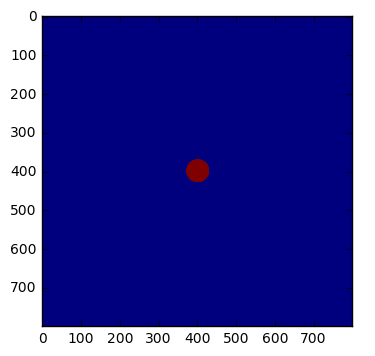

In [25]:
central_mask = np.zeros(newdata.shape)
xx, yy = np.meshgrid(np.arange(central_mask.shape[0]),np.arange(central_mask.shape[1]))
xc = newdata.shape[0]/2
yc = newdata.shape[1]/2
r = 30
central_mask_IDs = (xx-xc)**2+(yy-yc)**2 < r**2
plt.imshow(central_mask_IDs)